# Importing libraries and clean dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/bazillaimran/Documents/03-2024 Airbnb US Analysis'

In [3]:
df_clean = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','AB_US_2023_cleaned.csv'))

In [4]:
matplotlib.__version__

'3.7.2'

In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# Pick out variables for exploratory visual analysis

In [6]:
df_clean.shape

(232147, 18)

In [7]:
pd.options.display.max_columns = None

In [8]:
df_clean.columns

Index(['Unnamed: 0', 'listing_id', 'listing_name', 'host_id', 'host_name',
       'neighborhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last_12_month_reviews_count', 'city'],
      dtype='object')

In [9]:
# Create a subset with variables of interest 
df_sub = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','last_12_month_reviews_count']]
df_sub

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_12_month_reviews_count
0,202,2,383,2.31,1,128,59
1,235,30,111,0.66,1,365,0
2,56,32,9,0.09,13,365,1
3,575,9,28,0.17,2,365,0
4,110,1,770,4.65,2,159,34
...,...,...,...,...,...,...,...
232142,389,2,0,0.00,1,365,0
232143,158,1,0,0.00,1,364,0
232144,97,1,0,0.00,32,359,0
232145,62,2,0,0.00,3,67,0


# Create Correlation Matrix

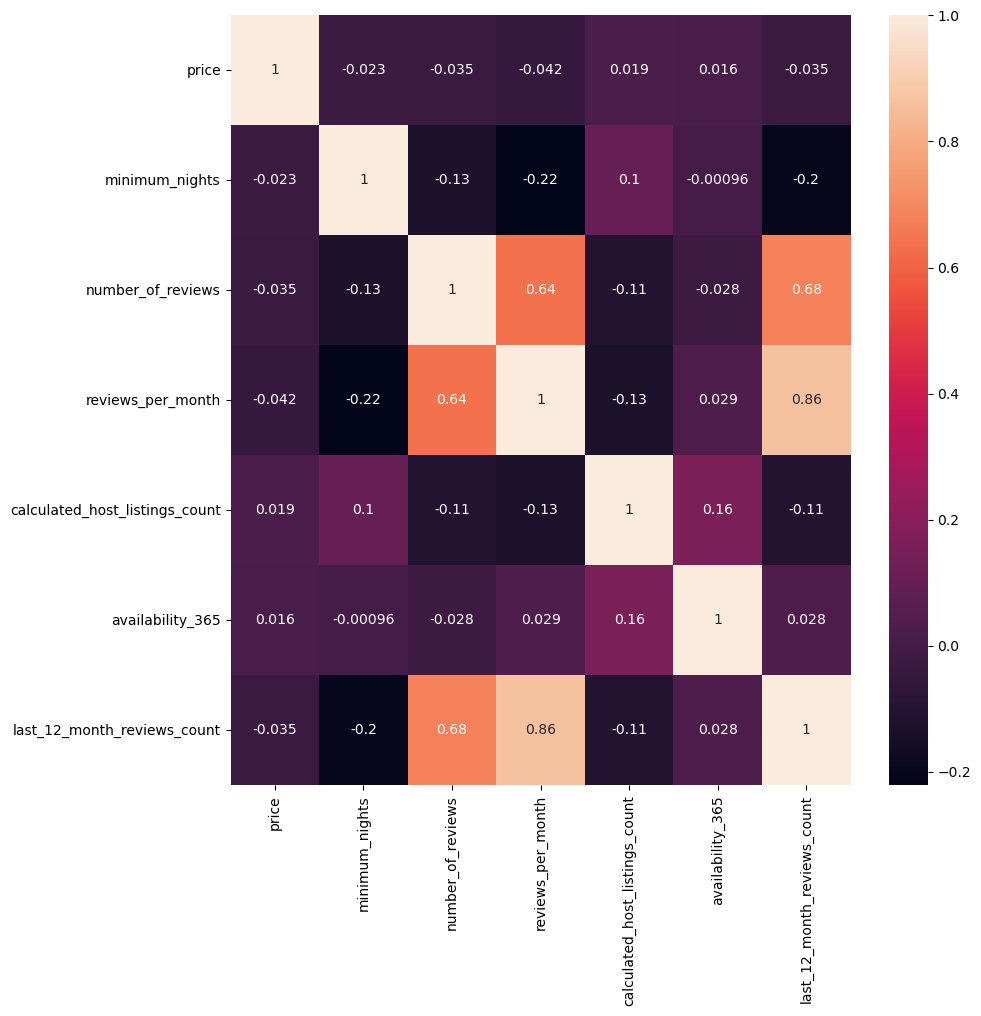

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_1 = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

There aren't any significant correlations among these variables, except for reviews per month, number of reviews, and number of reviews in the last twelve months - which is understandable as they are different representations of similar data. The next notable correlation, even though a mild negative one, is between minimum_nights and both reviews_per_month and last_12_month_reviews_count.

# Create a scatterplots for the variables with the strongest correlations

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


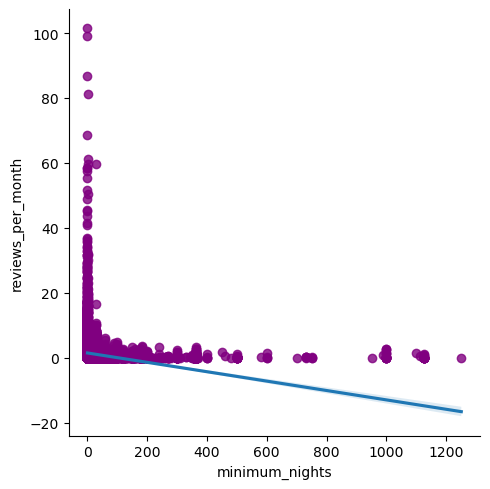

In [11]:
# Create scatterplot for the "minimum_nights" and "reviews_per_month" columns
sns.lmplot(x = 'minimum_nights', y = 'reviews_per_month', data = df_clean, scatter_kws={'color': 'purple'})

Based on the scatterplot, we can infer that listings with fewer minimum night requirements tend to generate more reviews. This is logical since most listings are booked for fewer nights, increasing the chances of receiving more reviews from guests who booked shorter stays. We also observe a few outliers ranging between 900 to 1250.

# Investigating Outliers

In [12]:
df_clean['minimum_nights'].describe()

count    232147.000000
mean         13.495867
std          27.920631
min           1.000000
25%           2.000000
50%           3.000000
75%          30.000000
max        1250.000000
Name: minimum_nights, dtype: float64

<Axes: >

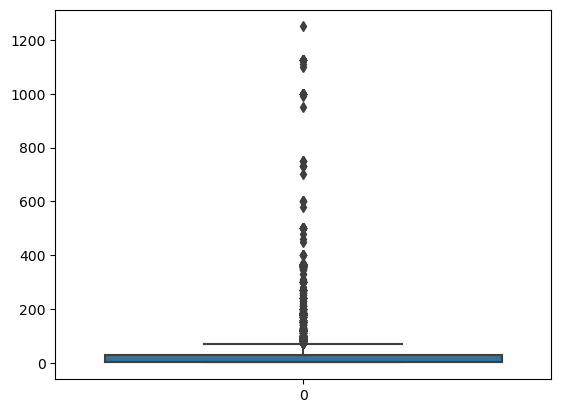

In [13]:
# Minimum nights IQR analysis
sns.boxplot(df_clean['minimum_nights'])

In [14]:
#IQR - Calculating upper and lower limits
Q1_nights = df_clean['minimum_nights'].quantile(0.25)
Q3_nights = df_clean['minimum_nights'].quantile(0.75)
IQR_nights = Q3_nights - Q1_nights
lower_nights = Q1_nights - 1.5*IQR_nights
upper_nights = Q3_nights + 1.5*IQR_nights

print(IQR_nights)
print(lower_nights)
print(upper_nights)

28.0
-40.0
72.0


I would like to group listings as follows: "vacation rental" = less than 30 night minimum. "long term rental" = greater than 30 night minimum. 

In [15]:
# Vacation Rental flag
df_clean.loc[df_clean['minimum_nights'] <= 30, 'rental_type'] = 'Vacation Rental'

In [16]:
# Long Tern Flag 
df_clean.loc[df_clean['minimum_nights'] > 30, 'rental_type'] = 'Long Term Rental'

In [17]:
df_clean['rental_type'].value_counts(dropna = False)

rental_type
Vacation Rental     211837
Long Term Rental     20310
Name: count, dtype: int64

In [18]:
df_clean.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_12_month_reviews_count,city,rental_type
0,0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2/19/23,2.31,1,128,59,San Francisco,Vacation Rental
1,1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,8/6/17,0.66,1,365,0,San Francisco,Vacation Rental
2,2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,10/27/22,0.09,13,365,1,San Francisco,Long Term Rental
3,3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,6/28/19,0.17,2,365,0,San Francisco,Vacation Rental
4,4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2/25/23,4.65,2,159,34,San Francisco,Vacation Rental


<Axes: >

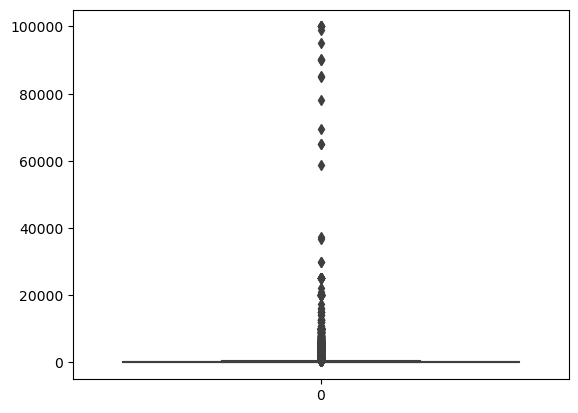

In [19]:
# Price IQR Analysis
sns.boxplot(df_clean['price'])

In [20]:
#IQR - Calculating upper and lower limits
Q1_price = df_clean['price'].quantile(0.25)
Q3_price = df_clean['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_price = Q1_price - 1.5*IQR_price
upper_price = Q3_price + 1.5*IQR_price

print(IQR_price)
print(lower_price)
print(upper_price)

159.0
-147.5
488.5


/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

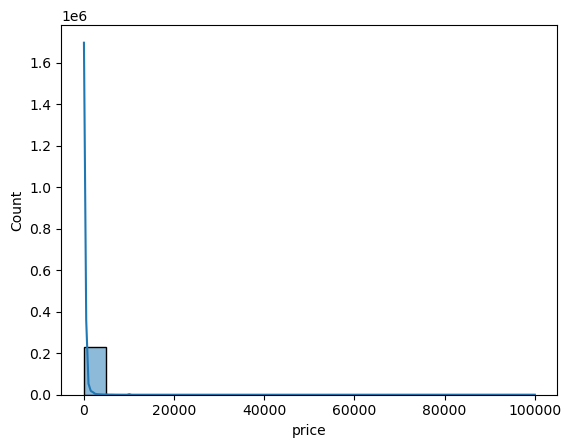

In [21]:
#Checking Distribution of Prices
sns.histplot(df_clean['price'],bins = 20, kde = True)

The data's diversity makes it challenging to identify clear relationships between variables due to numerous outliers. To improve the clarity of the analysis, I decided to focus on a narrower subset of the data. This subset centers around Airbnb listings typically used for vacations, specifically those equal to or less than 30 nights.

In [22]:
# Create labels for pricing
df_clean.loc[df_clean['price'] < 150, 'price_category'] = 'low price'
df_clean.loc[(df_clean['price'] >= 150) & (df_clean['price'] < 450), 'price_category'] = 'mid-price'
df_clean.loc[(df_clean['price'] >= 450) & (df_clean['price'] < 1000), 'price_category'] = 'high price'
df_clean.loc[df_clean['price'] >= 1000, 'price_category'] = 'expensive'

In [23]:
df_clean['price_category'].value_counts(dropna = False)

price_category
low price     116444
mid-price      93308
high price     16410
expensive       5985
Name: count, dtype: int64

<Axes: >

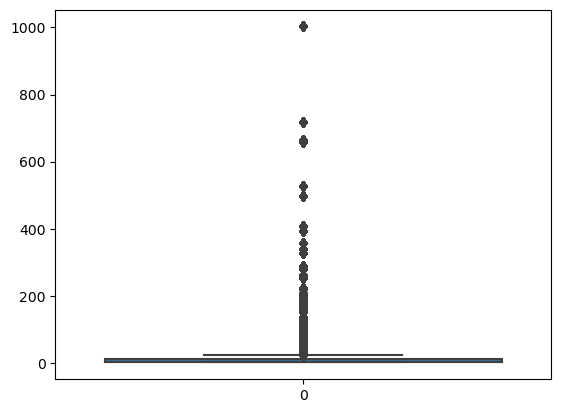

In [24]:
# count_ IQR Analysis
sns.boxplot(df_clean['calculated_host_listings_count'])

In [25]:
#IQR - Calculating upper and lower limits
Q1_calculated_host_listings_count = df_clean['calculated_host_listings_count'].quantile(0.25)
Q3_calculated_host_listings_count = df_clean['calculated_host_listings_count'].quantile(0.75)
IQR_calculated_host_listings_count = Q3_calculated_host_listings_count - Q1_calculated_host_listings_count
lower_calculated_host_listings_count = Q1_calculated_host_listings_count - 1.5*IQR_calculated_host_listings_count
upper_calculated_host_listings_count = Q3_calculated_host_listings_count + 1.5*IQR_calculated_host_listings_count

print(IQR_calculated_host_listings_count)
print(lower_calculated_host_listings_count)
print(upper_calculated_host_listings_count)

9.0
-12.5
23.5


/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='calculated_host_listings_count', ylabel='Count'>

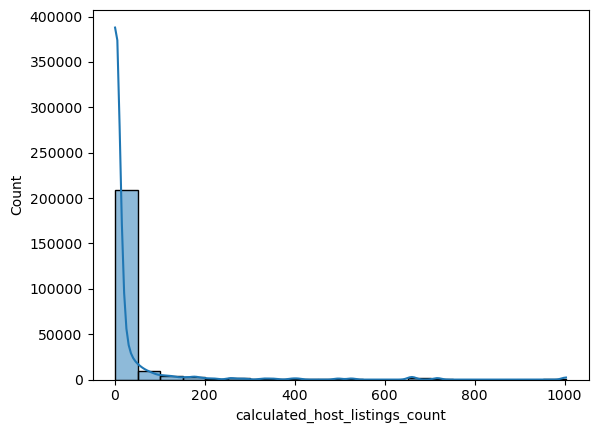

In [26]:
#Checking Distribution of Prices
sns.histplot(df_clean['calculated_host_listings_count'],bins = 20, kde = True)

After running the pairplots, I have realized to get ride of outliers in calculated_host_listings_count as well. I would like to group listings as follows: "majority count" <= less than 500 calculated_host_listings_count. "minority count" = greater than 500 calculated_host_listings_count. 

In [27]:
# Create labels for calculated_host_listings_count
df_clean.loc[df_clean['calculated_host_listings_count'] <= 500,'listings_per_host'] = '500 or less'
df_clean.loc[df_clean['calculated_host_listings_count'] > 500,'listings_per_host'] = 'more than 500'

# Create new subset for analysis

In [28]:
df_clean.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_12_month_reviews_count,city,rental_type,price_category,listings_per_host
0,0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2/19/23,2.31,1,128,59,San Francisco,Vacation Rental,mid-price,500 or less
1,1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,8/6/17,0.66,1,365,0,San Francisco,Vacation Rental,mid-price,500 or less
2,2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,10/27/22,0.09,13,365,1,San Francisco,Long Term Rental,low price,500 or less
3,3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,6/28/19,0.17,2,365,0,San Francisco,Vacation Rental,high price,500 or less
4,4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2/25/23,4.65,2,159,34,San Francisco,Vacation Rental,low price,500 or less


In [29]:
# Drop columns in df_ords_prods_combined (not necessary) 
df_clean = df_clean.drop(columns = ['Unnamed: 0'])

In [30]:
df_clean.head()

,listing_id,listing_name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_12_month_reviews_count,city,rental_type,price_category,listings_per_host
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2/19/23,2.31,1,128,59,San Francisco,Vacation Rental,mid-price,500 or less
1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,8/6/17,0.66,1,365,0,San Francisco,Vacation Rental,mid-price,500 or less
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,10/27/22,0.09,13,365,1,San Francisco,Long Term Rental,low price,500 or less
3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,6/28/19,0.17,2,365,0,San Francisco,Vacation Rental,high price,500 or less
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2/25/23,4.65,2,159,34,San Francisco,Vacation Rental,low price,500 or less


In [31]:
df_clean.shape

(232147, 20)

In [32]:
# Create subset for prices under $1,000 per night
df_subset = df_clean.loc[df_clean['price'] < 1000]

In [33]:
# Check counts
df_subset['price_category'].value_counts(dropna = False)

price_category
low price     116444
mid-price      93308
high price     16410
Name: count, dtype: int64

In [34]:
df_subset['price'].describe()

count    226162.000000
mean        192.053409
std         156.981953
min           0.000000
25%          90.000000
50%         145.000000
75%         239.000000
max         999.000000
Name: price, dtype: float64

In [35]:
# Create subset without any "long Term Rentals"
df_analysis = df_subset.loc[df_clean['rental_type'] != 'Long Term Rental']

In [36]:
df_analysis['rental_type'].value_counts(dropna = False)

rental_type
Vacation Rental    206120
Name: count, dtype: int64

In [37]:
# Create subset without any "more than 500" listings per Host
df_final_sub = df_analysis.loc[df_clean['listings_per_host'] != 'more than 500']

In [38]:
df_final_sub.head()

,listing_id,listing_name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_12_month_reviews_count,city,rental_type,price_category,listings_per_host
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2/19/23,2.31,1,128,59,San Francisco,Vacation Rental,mid-price,500 or less
1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,8/6/17,0.66,1,365,0,San Francisco,Vacation Rental,mid-price,500 or less
3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,6/28/19,0.17,2,365,0,San Francisco,Vacation Rental,high price,500 or less
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2/25/23,4.65,2,159,34,San Francisco,Vacation Rental,low price,500 or less
5,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,Bayview,37.71750,-122.39698,Private room,95,1,19,1/28/23,0.12,2,365,1,San Francisco,Vacation Rental,low price,500 or less


In [39]:
df_final_sub.shape

(204454, 20)

In [40]:
df_plot = df_final_sub[['price','minimum_nights','number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'last_12_month_reviews_count']]

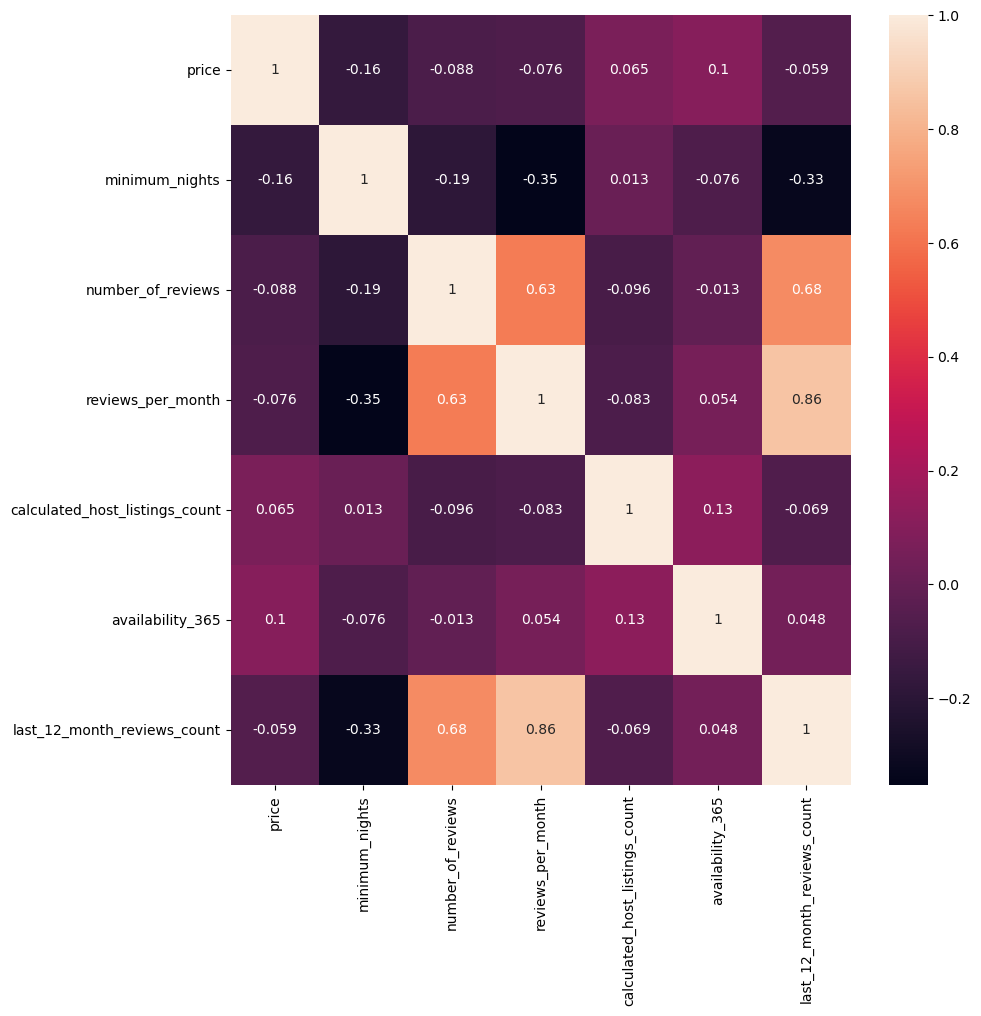

In [41]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_2 = sns.heatmap(df_plot.corr(), annot = True, ax = ax)

After creating a subset, the correlation between minimum_nights and reviews_per_month increased to a correlation of -0.35 from -0.22. This indicates a stronger negative correlation between these two variables in the subset compared to the original dataset.

In [42]:
#Export Heatmap
corr_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap.png'))

# Create Scatterplots from the subset

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


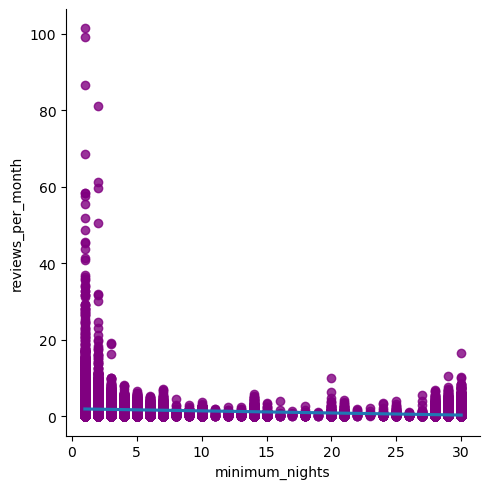

In [43]:
# Create scatterplot for the "minimum_nights" and "reviews_per_month" columns 
scatter_1 = sns.lmplot(x = 'minimum_nights', y = 'reviews_per_month', data = df_plot, scatter_kws={'color': 'purple'})

Based on this plot, it's unlikely that the number of reviews per month indicates a unit's popularity. There is no causal relationship between the number of reviews per month and the minimum nights required.

In [44]:
#Export Scatterplot
scatter_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'min_nights_reviews.png'))

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


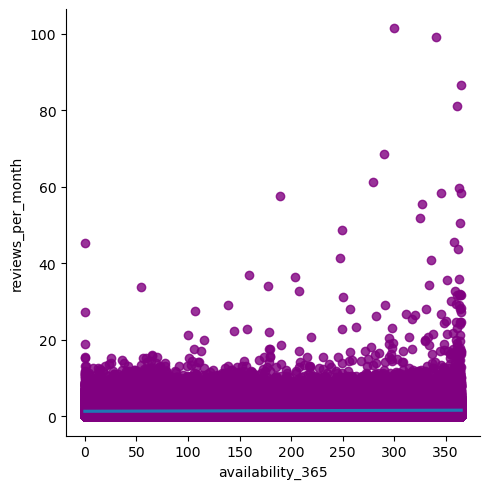

In [45]:
# Create scatterplot for the "availability_365" and "reviews_per_month" columns 
sns.lmplot(x = 'availability_365', y = 'reviews_per_month', data = df_plot, scatter_kws={'color': 'purple'})

In [46]:
# Check columns
df_analysis.columns

Index(['listing_id', 'listing_name', 'host_id', 'host_name', 'neighborhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'last_12_month_reviews_count', 'city', 'rental_type', 'price_category',
       'listings_per_host'],
      dtype='object')

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

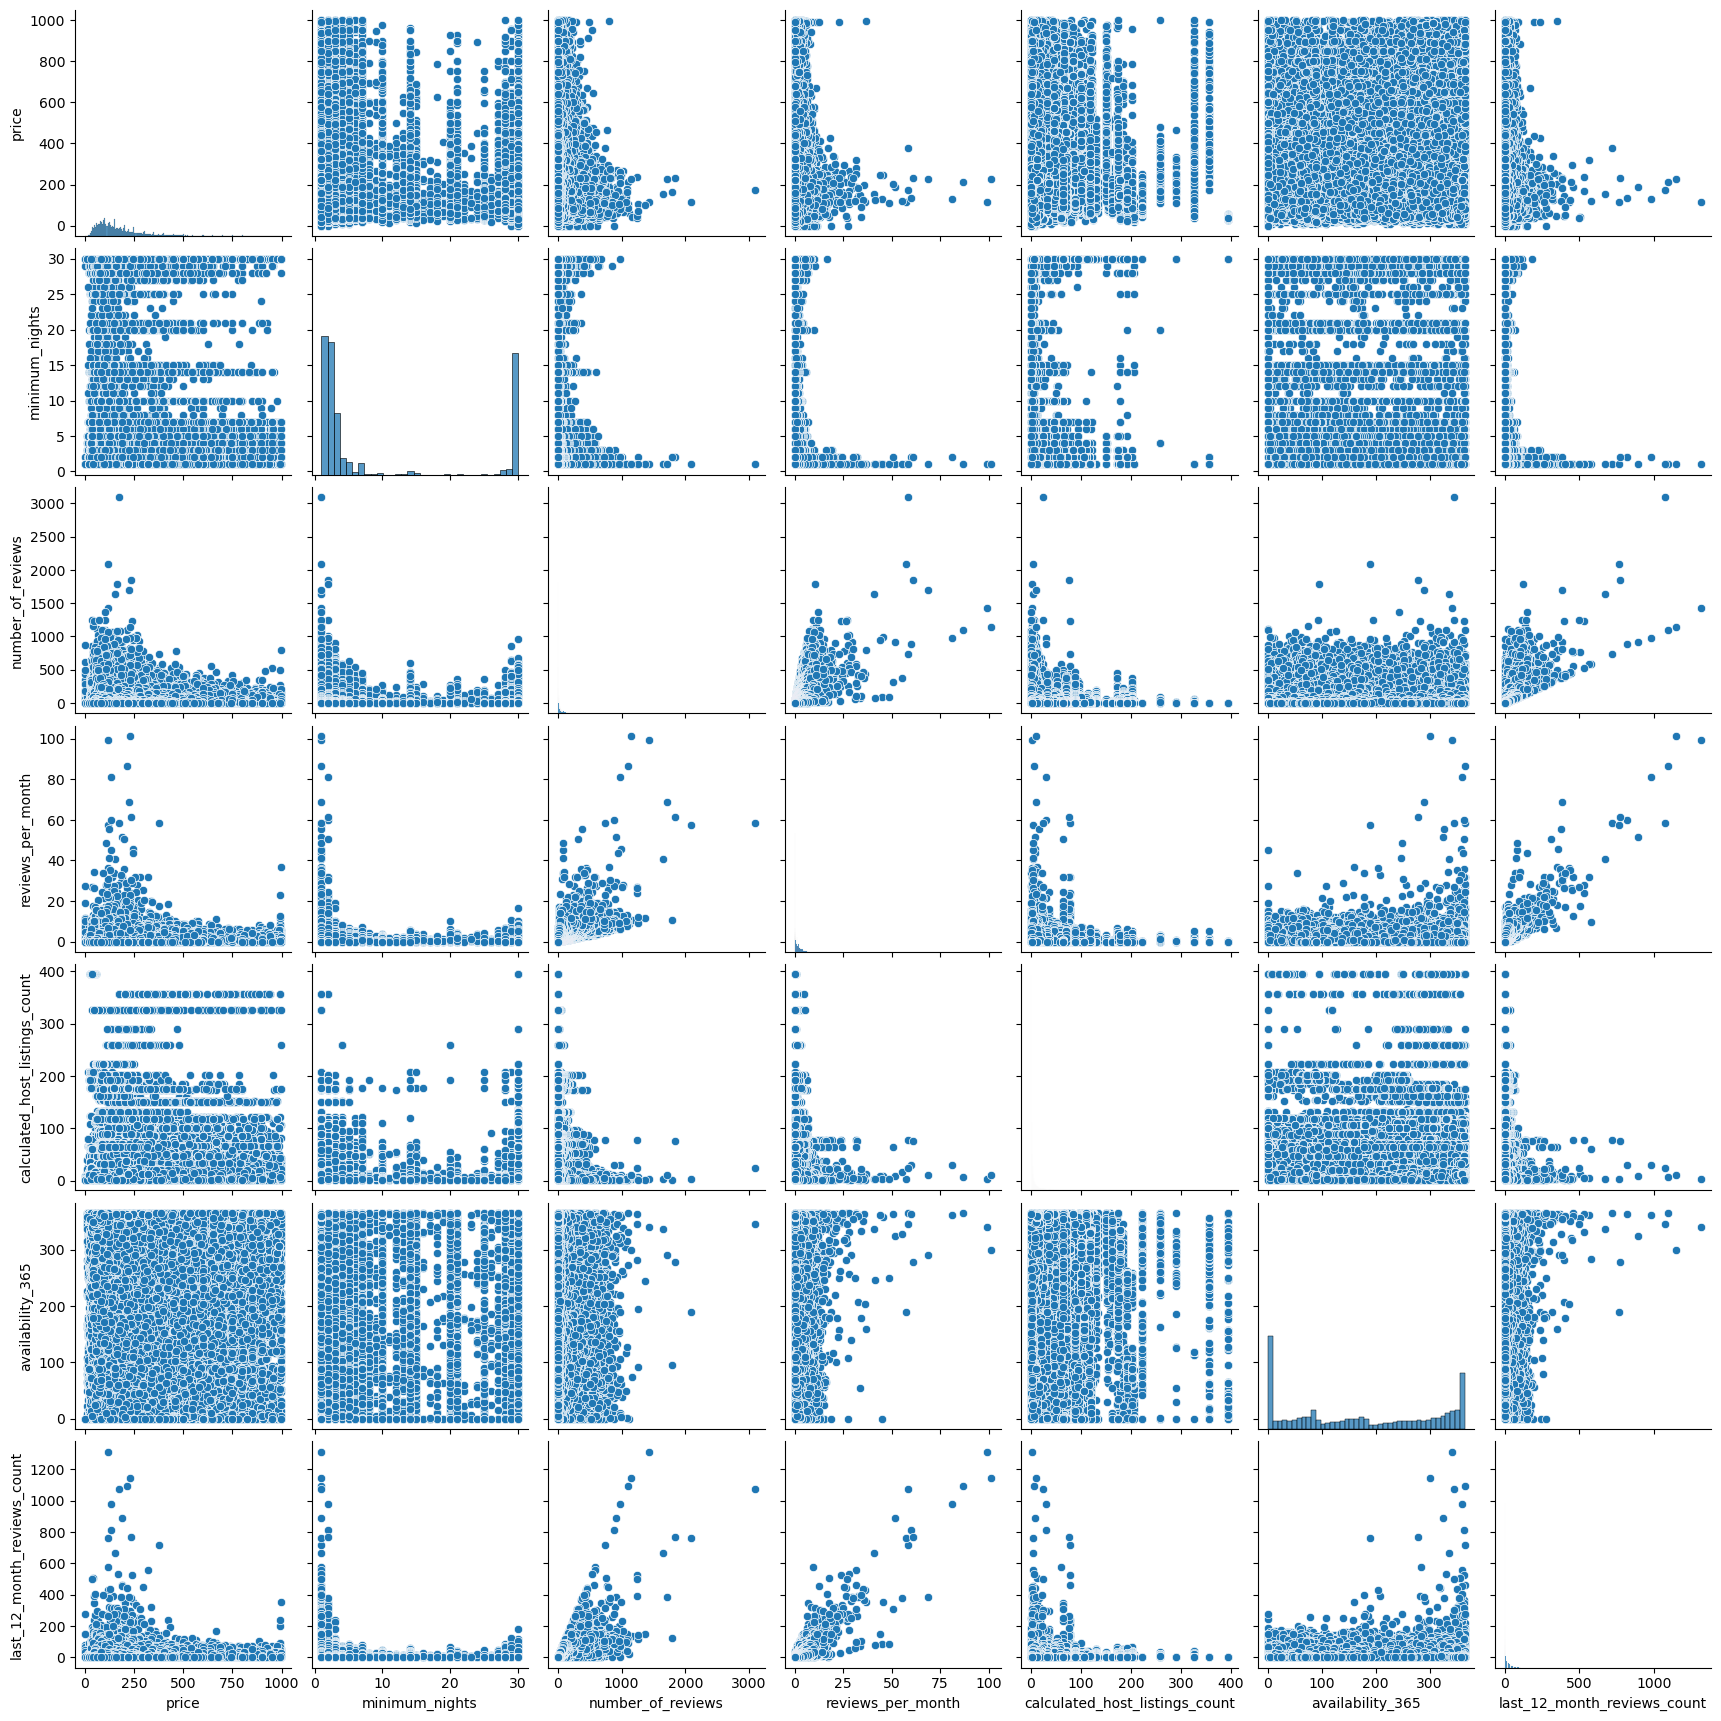

In [47]:
# Create pair plot
pairplot = sns.pairplot(df_plot)

From these pair plots, no strong relationships are apparent. Further exploration for these variables: availability and minimum nights, as well as the relationship between calculated host listings and availability.The dataset still contains outliers, which obscure the visualization of relationships in the graph. Therefore, I've chosen to use only listings with a calculated host listing count of less than 500 to clarify the data.

In [48]:
#Export pairplots
pairplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

# Categorical Plot

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='minimum_nights', ylabel='Count'>

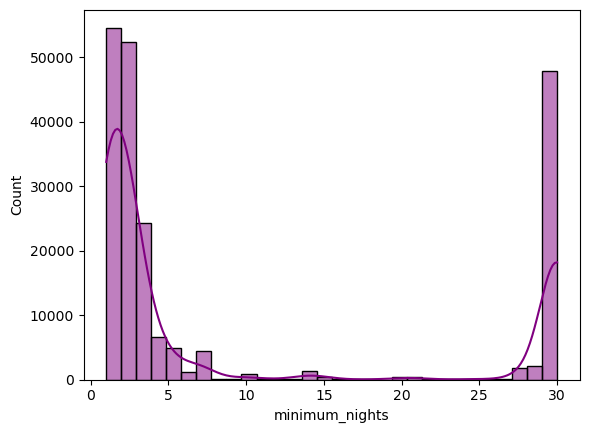

In [49]:
# Understanding minimum nighs vs reviews per month
sns.histplot(df_final_sub['minimum_nights'],bins = 30, kde = True, color='purple')

In [50]:
#Apply booking_requirement flags
df_final_sub.loc[df_final_sub['minimum_nights'] < 7, 'booking_requirement'] = 'less than 1 week'
df_final_sub.loc[(df_final_sub['minimum_nights'] >= 7) & (df_final_sub['minimum_nights'] < 21 ), 'booking_requirement'] = '1-3 weeks'
df_final_sub.loc[df_final_sub['minimum_nights'] >= 21, 'booking_requirement'] = 'over 3 weeks'

/var/folders/17/9z1yp8ss3r174mlj49ql3qgr0000gn/T/ipykernel_72412/2640038261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_sub.loc[df_final_sub['minimum_nights'] < 7, 'booking_requirement'] = 'less than 1 week'


In [51]:
df_final_sub['booking_requirement'].value_counts(dropna = False)

booking_requirement
less than 1 week    144023
over 3 weeks         52518
1-3 weeks             7913
Name: count, dtype: int64

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


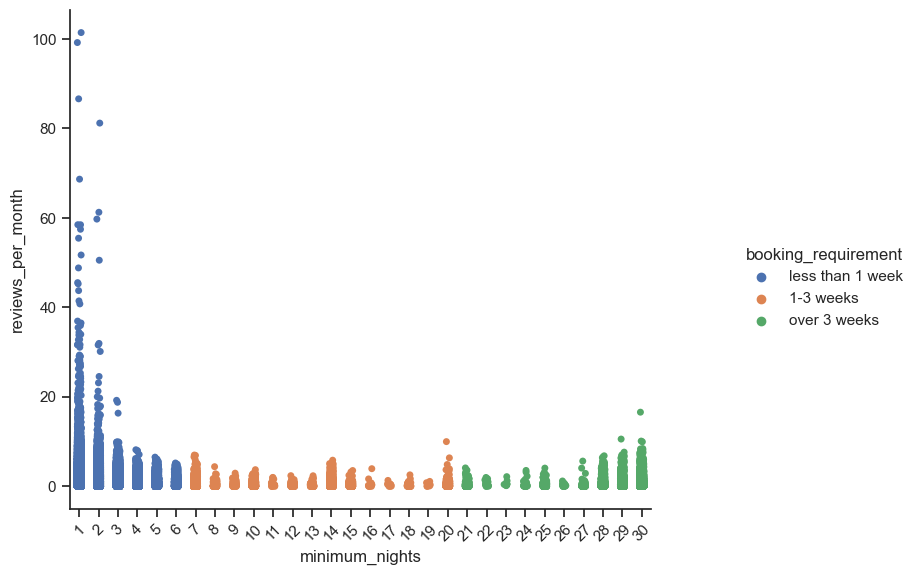

In [52]:
# Create Categorical Plot - minimum nighs vs reviews per month
sns.set(style="ticks")
cat_1 = sns.catplot(x='minimum_nights', y='reviews_per_month', hue='booking_requirement', data=df_final_sub)

cat_1.fig.set_size_inches(10, 6)
cat_1.set_xticklabels(rotation=45) 

Upon further examination of the relationship between 'reviews_per_month' and 'minimum_nights', it's not necessarily accurate to infer that a higher number of reviews indicates a more popular listing. As previously noted, most listings are booked for shorter stays (less than a week), thereby increasing the likelihood of those listings receiving more reviews from guests who have opted for shorter stays.

In [53]:
#Export Categorical Plot
cat_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_min_nights_reviews.png'))

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Count'>

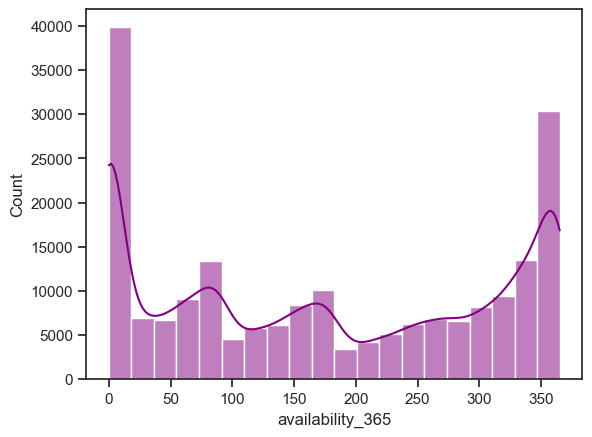

In [54]:
# Avalibility Categorial Plots 
sns.histplot(df_final_sub['availability_365'],bins = 20, kde = True, color='purple')

In [55]:
#Apply Annual Availibilty flags
df_final_sub.loc[df_final_sub['availability_365'] < 50, 'Annual Availibilty'] = '< 50 day'
df_final_sub.loc[(df_final_sub['availability_365'] >=50) & (df_final_sub['availability_365'] < 183 ), 'Annual Availibilty'] = '< 6 months'
df_final_sub.loc[(df_final_sub['availability_365'] >=183) & (df_final_sub['availability_365'] < 365 ), 'Annual Availibilty'] = '> 6 months & < a year'
df_final_sub.loc[df_final_sub['availability_365'] >= 365, 'Annual Availibilty'] = 'Always Available'

/var/folders/17/9z1yp8ss3r174mlj49ql3qgr0000gn/T/ipykernel_72412/271644354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_sub.loc[df_final_sub['availability_365'] < 50, 'Annual Availibilty'] = '< 50 day'


In [56]:
df_final_sub['Annual Availibilty'].value_counts(dropna = False)

Annual Availibilty
> 6 months & < a year    85120
< 6 months               59433
< 50 day                 51458
Always Available          8443
Name: count, dtype: int64

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


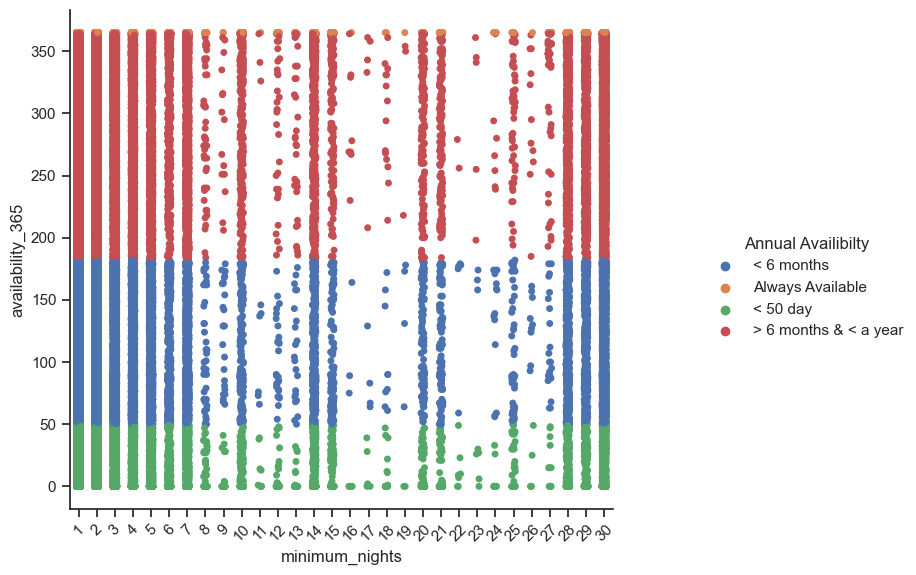

In [57]:
# Create Categorical Plot for Availability vs. Minimum Nights
sns.set(style = "ticks")
cat_2 = sns.catplot(x = 'minimum_nights', y = 'availability_365', hue = 'Annual Availibilty', data = df_final_sub)

cat_2.fig.set_size_inches(10, 6)
cat_2.set_xticklabels(rotation=45)

In [58]:
#Export vailability vs. Minimum Nights plot
cat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_min_nights_availability.png'))

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/17/9z1yp8ss3r174mlj49ql3qgr0000gn/T/ipykernel_72412/725958863.py:9: UserWarning: The figure layout has changed to tight
  cat_3.fig.tight_layout()


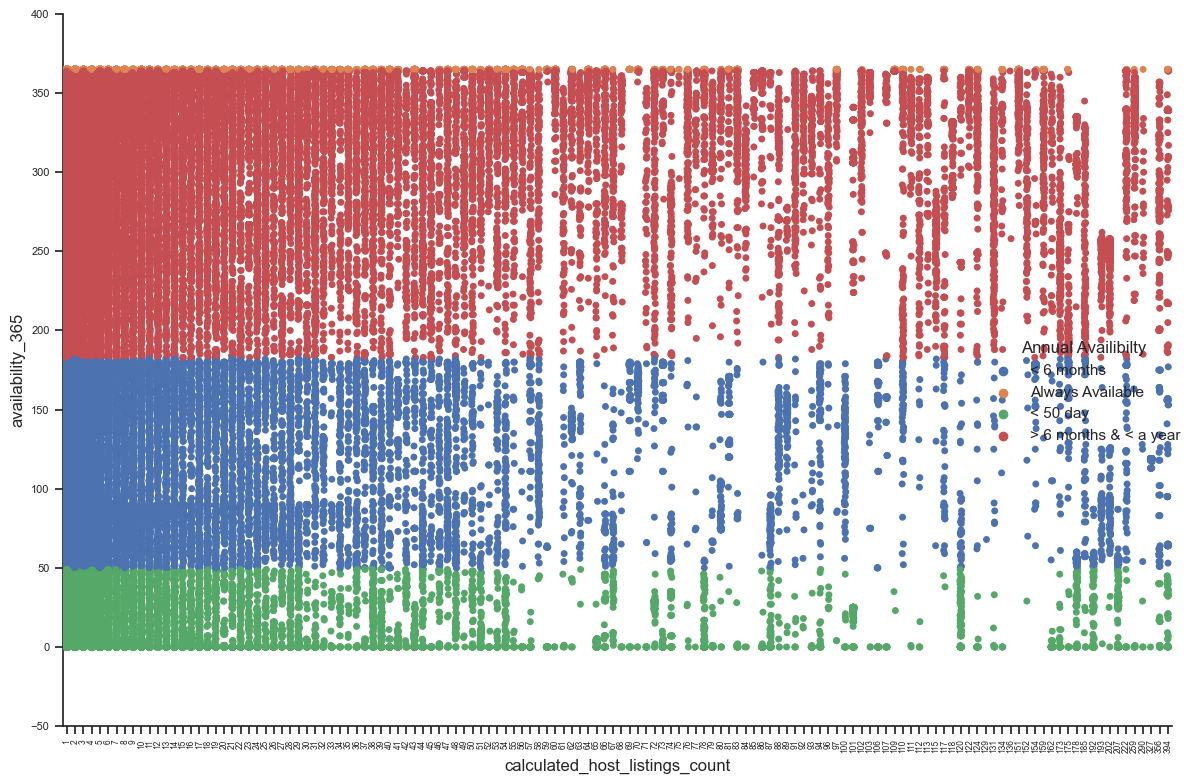

In [59]:
# Create Categorical Plot for Availability vs Calculated Host Listings
sns.set(style = "ticks")
cat_3 = sns.catplot(y = 'availability_365', x = 'calculated_host_listings_count', hue = 'Annual Availibilty', data = df_final_sub)

cat_3.fig.set_size_inches(12, 8)
cat_3.set_xticklabels(rotation=90)
cat_3.set_xticklabels(fontsize=6)
cat_3.set_yticklabels(fontsize=8)
cat_3.fig.tight_layout()

It seems like majority of the hosts have less number of listings. 

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


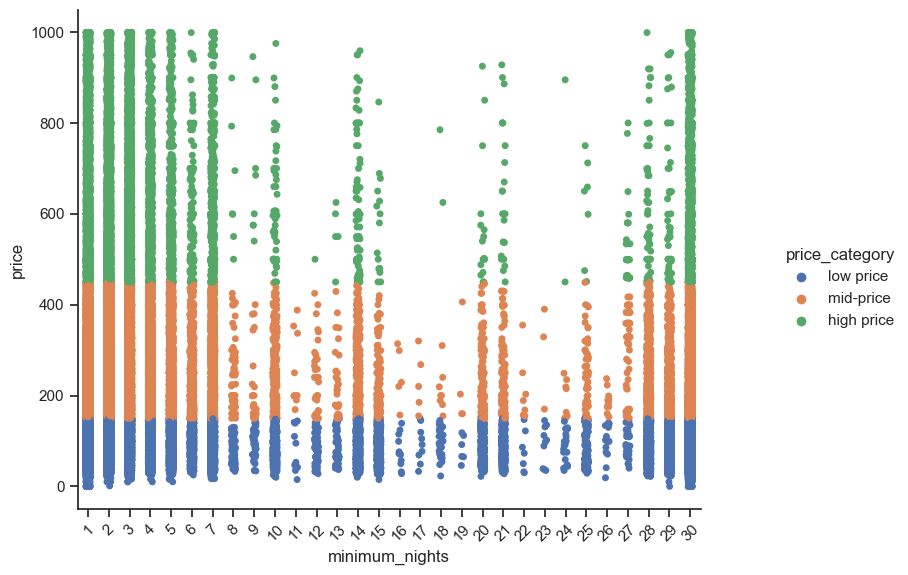

In [60]:
# Create Categorical Plot - Price vs minimum nigts 
sns.set(style = "ticks")
cat_4 = sns.catplot(x = 'minimum_nights', y = 'price', hue = 'price_category', data = df_final_sub)

cat_4.fig.set_size_inches(10, 6)
cat_4.set_xticklabels(rotation=45) 

For stays of 1-7 nights and the 30th night, it appears that listings are charging across all price ranges on average. However, for stays of 8-29 nights, the higher prices seem to be less common, with the majority of listings falling within the lower and middle price ranges. This could be due to fewer guests needing to book for non-standard periods, such as 8-29 days. Based on the histogram plot for minimum nights, it seems that most people are booking for either 7 days or a month.

In [61]:
#Export Cat plot Price vs minimum nigts 
cat_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_min_nights_price.png'))

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


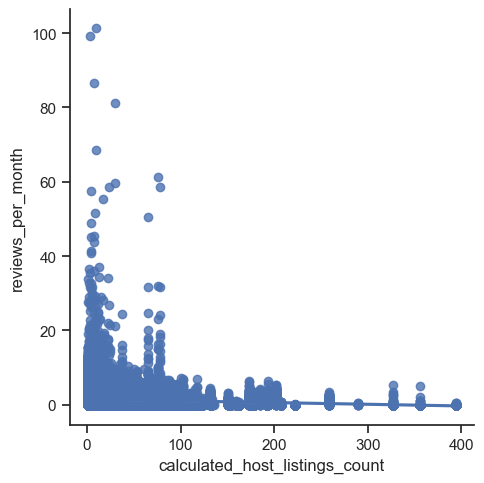

In [62]:
# Create Categorical Plot
scatter_3 = sns.lmplot(x = 'calculated_host_listings_count', y = 'reviews_per_month', data = df_plot)

# Key Questions

Though my initial hypothesis questions focused on the temporal and geographical data for each listing, these particular variables were not studied in this assignment. Nevertheless, this assignment prompted the following question: 

1) Is there a correlation between the minimum nights booked and the number of reviews per month?
> It's not necessarily true that a higher number of reviews signifies a more popular listing. The data shows a tendency for listings booked for shorter durations (less than a week) to receive more reviews, likely due to the higher turnover of guests.

2) Is there a relationship between the minimum nights booked and the listing price?
>There was also no significant relationship observed between these 2 variables. Listings are typically charged at all price ranges for stays of 1-7 nights and for the 30th night. However, for stays of 8-29 nights, most listings are priced in the lower to middle range, potentially due to less demand for these non-standard periods. The histogram plot for minimum nights suggests that the majority of bookings are for either 7 days or a month.

3) Is there a correlation between the number of listings per host and the number of reviews per month?
>There is not a strong relationship between the number of listings a host has and the number of reviews per month.

# Hypothesis

If listing prices are higher, then they may be more likely to be booked for shorter durations (1-7 nights) or guests might be willing to pay higher prices for longer stays.

# Export Data

In [63]:
#Exporting subset of vacation rentals/price under $1,000/ calculated_host_listings_count 500 or less 
df_final_sub.to_csv(os.path.join(path, '02 Data','Prepared Data', 'vacation_price_listings_subset.csv'))

In [64]:
#Exporting df_clean (non-subset, with category flags applied)
df_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_clean_flagged.csv'))